#Bike Sharing Assignment

In [834]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

In [835]:
# changing pandas visual settings to get all rows and columns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

## Data Understanding





In [836]:
# Reading the data

day_df = pd.read_csv("/content/day.csv")


In [837]:
# Checking the shape of the datafram

day_df.shape

(730, 16)

In [838]:
# Printing the head of the data to see how data is looking

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [839]:
# Checking the info of the datafram

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [840]:
# Checking the null values into the data

day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


No Null values into the data

In [841]:
# checking statistical information about numerical columns
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [842]:
# checking for duplicate rows in dataframe
day_df.duplicated().sum()

0

No dublicate data found into the data

In [843]:
# checking the number of unique values
day_df.nunique()

,0
instant,730
dteday,730
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,498


### Variables to deal with in data cleaning.

['instant'] - Redundant variable as it is the row number.

['dteday'] - Redundant as we have month, season, weekday, workingday,year

['casual','registered'] - cnt is the Summation of these features.  

['season', 'mnth', 'weathersit', 'weekday'] - convert the numbers into

categories as right now it shows that these variables are ordinal but they are not.

# Data Cleaning

In [844]:
# Dropping the columns

day_df.drop(['instant', 'casual', 'registered', 'dteday'], axis= 'columns', inplace = True)

In [845]:
# Rechecking the data

day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [846]:
# mapping the numeric categorical variables to their values

day_df['season'] = day_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
day_df['mnth'] = day_df['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep',10:'oct', 11:'nov', 12:'dec'})
day_df['weathersit'] = day_df['weathersit'].map({1:'clear', 2:'mist', 3:'light rain/snow', 4:'heavy rain', 5:'foggy'})
day_df['weekday'] = day_df['weekday'].map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat', 7:'sun'})


In [847]:
# Cross checking the data frame
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Bivariate Analysis

In [848]:
# creating a function to make bar plot between categorical and numerical variable

def create_bar_plot(feature, hue_feature=None, ax=None):
    sns.barplot(data=day_df, x=feature, y='cnt', hue=hue_feature, ax=ax)


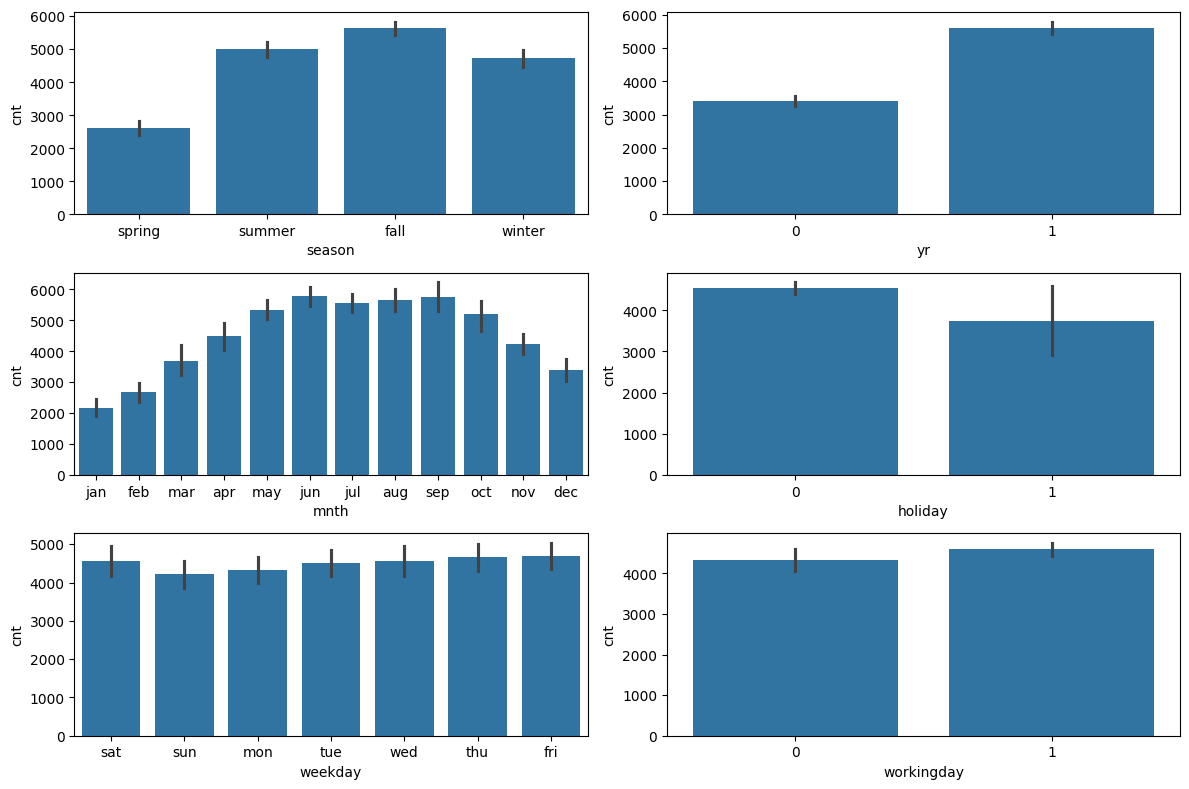

In [849]:
# Create a figure with subplots
nrows = 3
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

# Iterate over features and create bar plots in subplots
feature_count = 0
for i in range(nrows):
    for j in range(ncols):
        if feature_count >= len(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday']):
            break
        feature = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday'][feature_count]
        create_bar_plot(feature, ax=axes[i, j])
        feature_count += 1

plt.tight_layout()
plt.show()

1. 'Season' - fall season has the most count of people using boom bikes. Spring season has the least

2. 'Mnth' - Most of the bookings has been done during the month of may, june, july, aug, sep and oct. Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year.

3. 'Weekday' - Sunday has the least users and the users increases from monday to friday.


4. 'Workingday' - Booking seemed to be almost equal either on working day or non-working day.

5. 'Holiday' - Bikes are more used when there is no holiday.

6. 'Yr' - 2019 attracted more number of booking from the previous year.

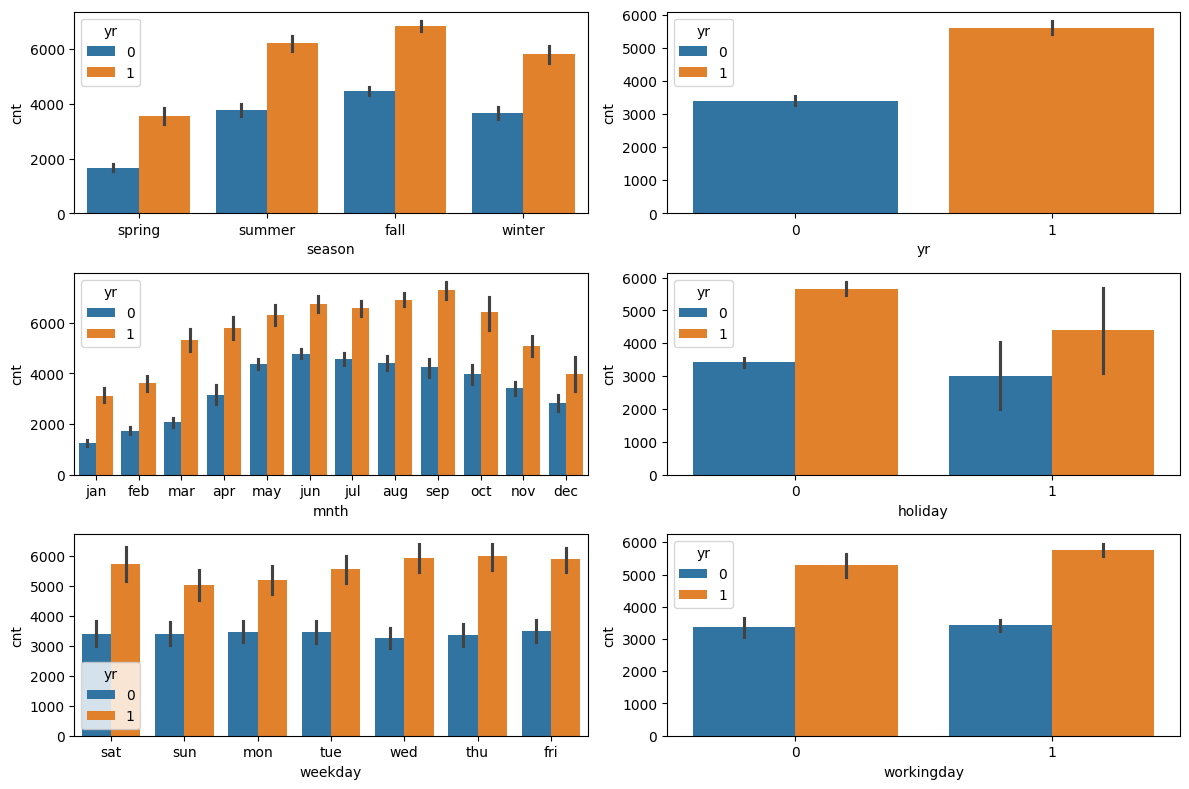

In [850]:
# Create a figure with subplots
nrows = 3
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))

# Iterate over features and create bar plots in subplots
feature_count = 0
for i in range(nrows):
    for j in range(ncols):
        if feature_count >= len(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday']):
            break
        feature = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday'][feature_count]
        create_bar_plot(feature, hue_feature='yr', ax=axes[i, j])
        feature_count += 1

plt.tight_layout()
plt.show()

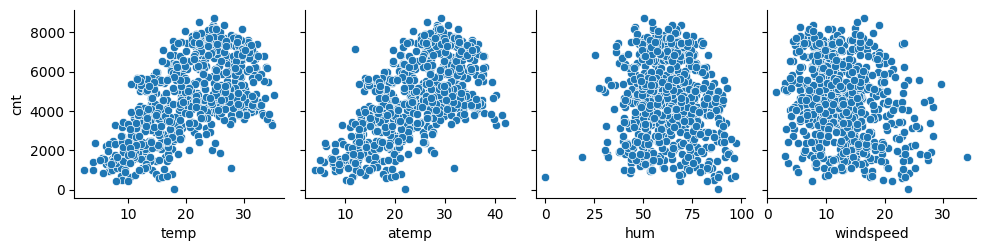

In [851]:
# creating a pairplot between the numerical variables
sns.pairplot(data=day_df,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt')
plt.show()

**temp** and **atemp** variables have the highest correlation with the target variable.


In [852]:
# creating dummy variables for categorical features.

months_df = pd.get_dummies(day_df['mnth'], drop_first=True).map(int)
weekdays_df=pd.get_dummies(day_df['weekday'],drop_first=True).map(int)
weathersit_df=pd.get_dummies(day_df['weathersit'],drop_first=True).map(int)
seasons_df=pd.get_dummies(day_df['season'],drop_first=True).map(int)

In [853]:
# concatinating the dummy variables with main dataframe

day_df = pd.concat([day_df,months_df,weekdays_df,weathersit_df,seasons_df],axis="columns")


In [854]:
# checking how dataframe looks after adding dummy variables
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light rain/snow,mist,spring,summer,winter
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [855]:
# dropping the source of dummy variables
day_df.drop(['mnth','weekday','weathersit','season'],inplace=True,axis='columns')

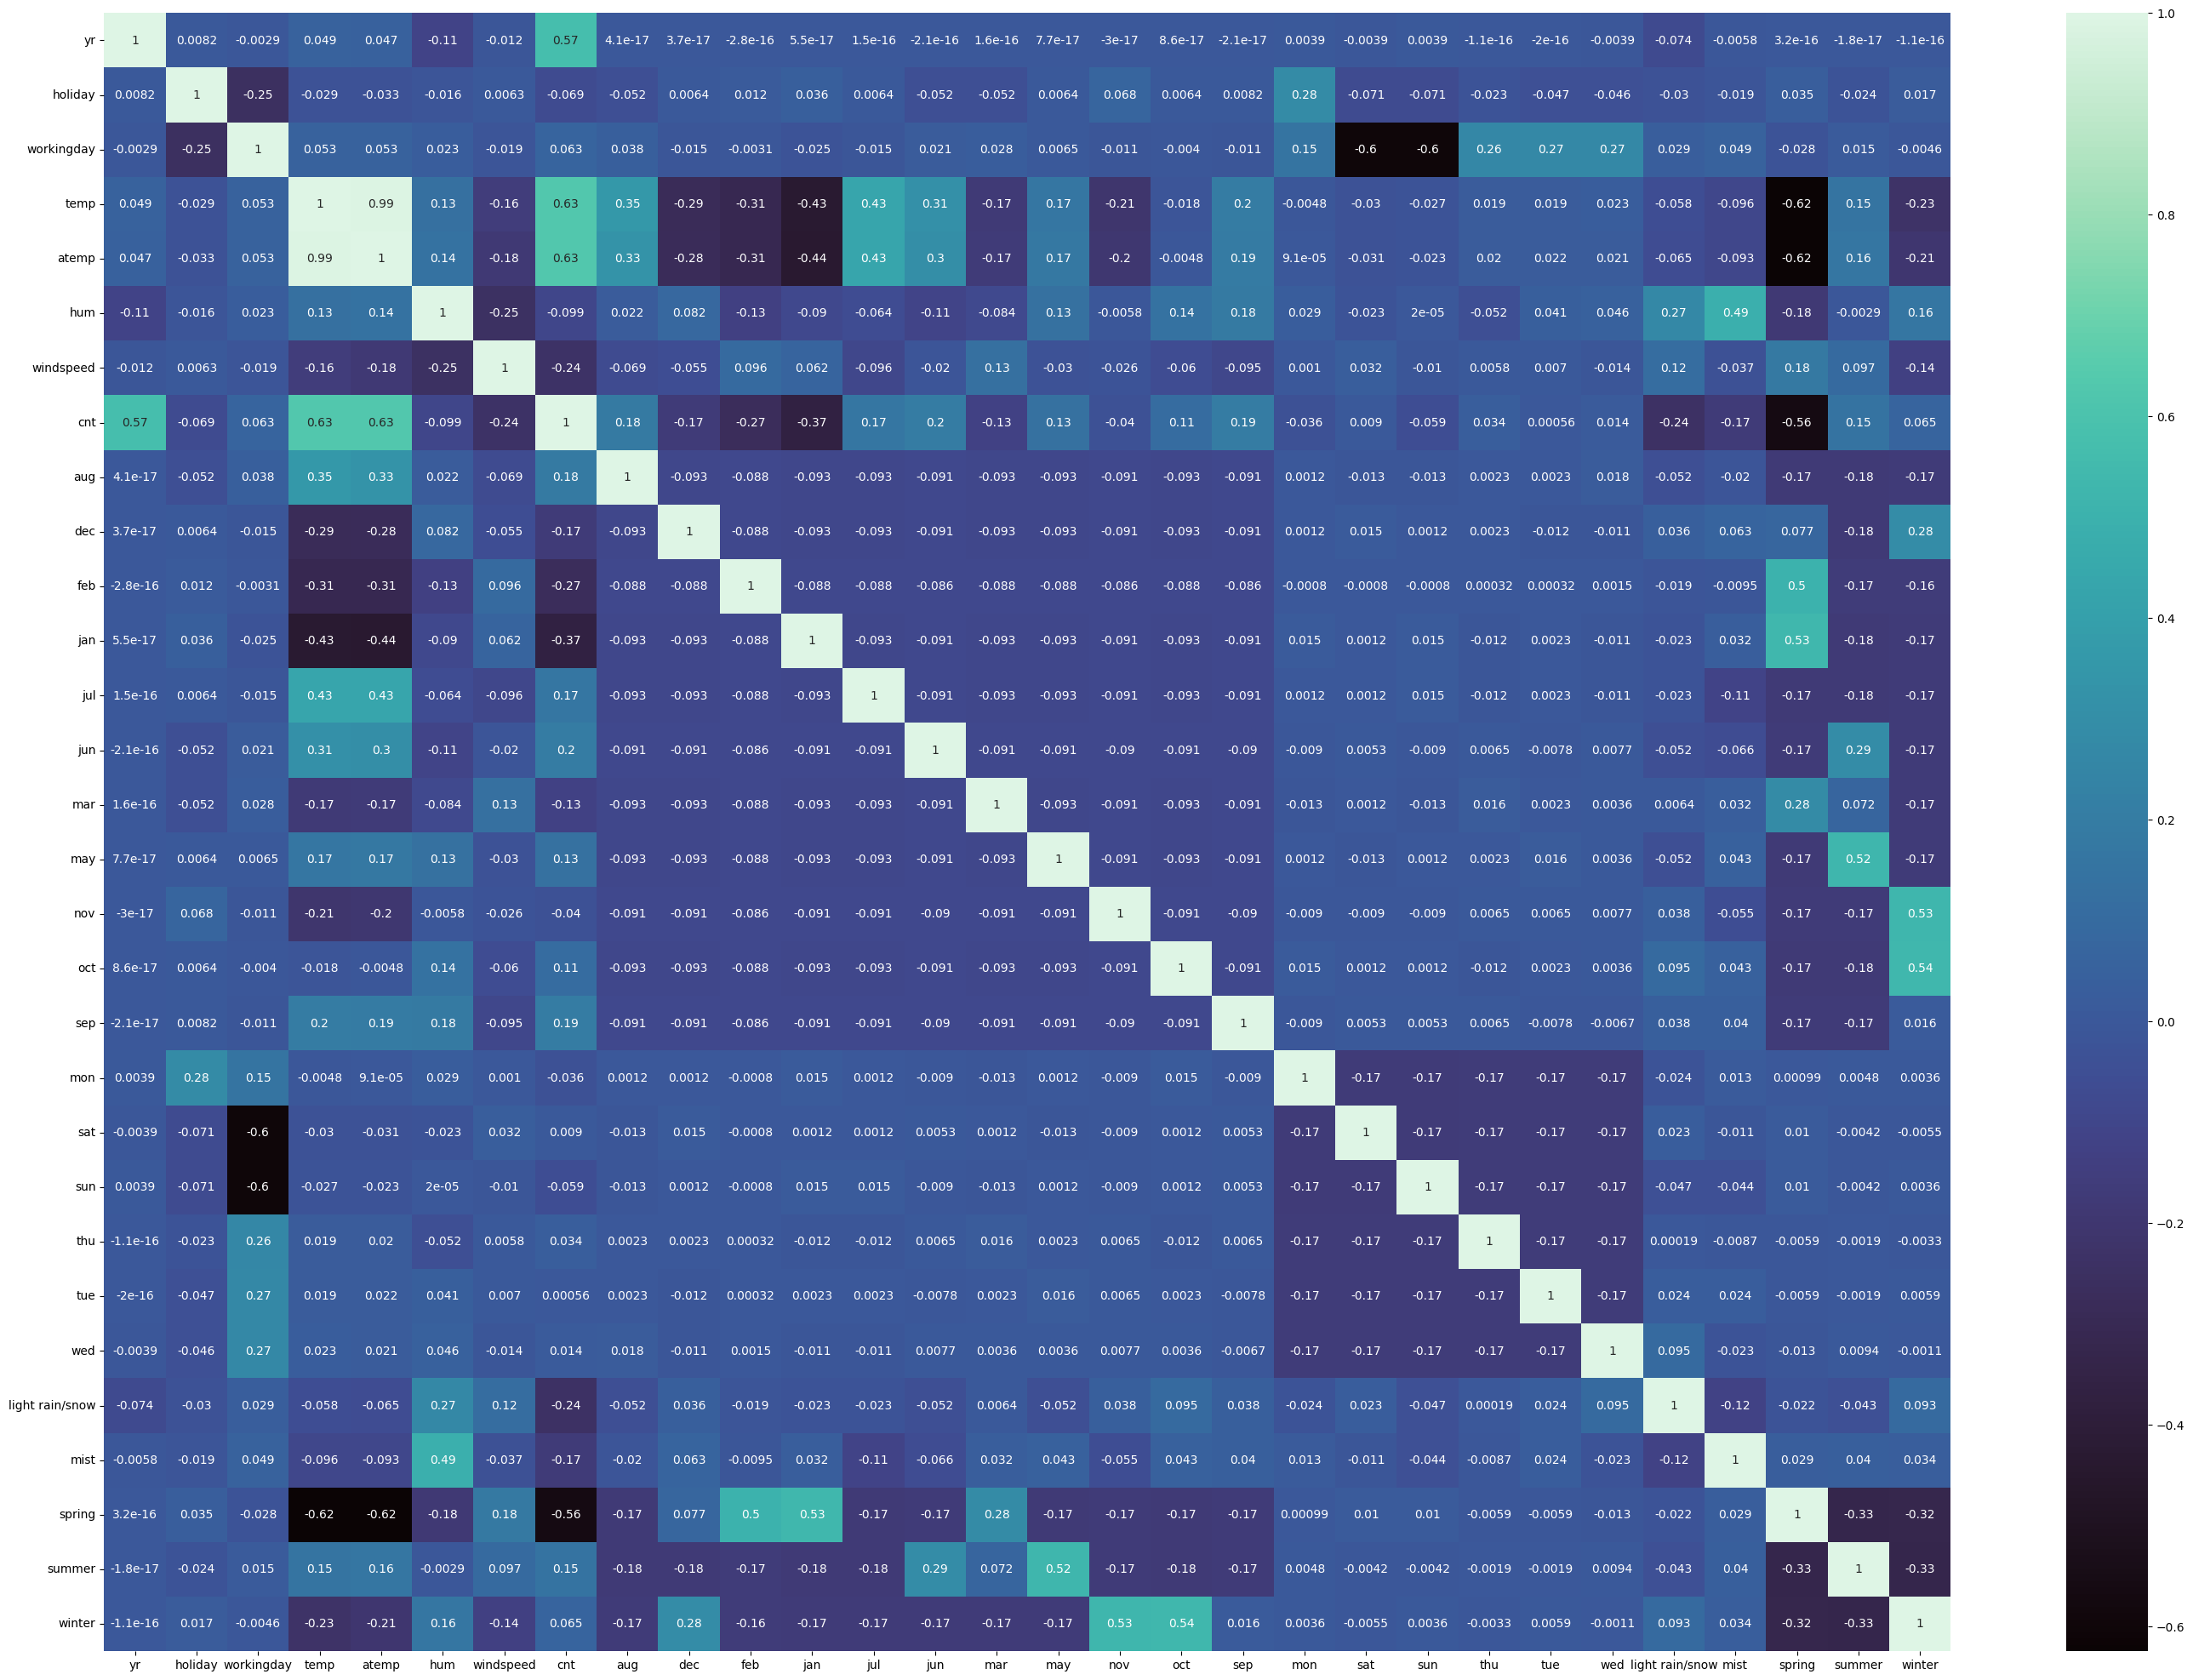

In [856]:
# creating a heatmap to show correlation after adding dummy variables.
plt.figure(figsize=(35,25))
sns.heatmap(day_df.corr(),annot=True,cmap="mako")
plt.show()

# Model bulding

In [857]:
# dividing the dataset into test and train dataset

train_df, test_df = train_test_split(day_df,train_size=0.7,random_state=100)


In [858]:
# printing the shape of training and testing dataset
print('Train Dataset: ',train_df.shape)
print('Test Dataset: ',test_df.shape)

Train Dataset:  (510, 30)
Test Dataset:  (220, 30)


In [859]:
# scaling the variables with min max scaler.
numerical_variables = ['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()
train_df[numerical_variables] = scaler.fit_transform(train_df[numerical_variables])

In [860]:
# checking description after scaling.
train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light rain/snow,mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,23.500287,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,8.090963,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,24.131150,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [861]:
# generating x and y datasets
y_train = train_df.pop("cnt")
X_train = train_df

# REF

In [862]:
# creating linear regression model with sklearn.
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [863]:
# using rfe to select some features from the model.

rfe = RFE(lr, n_features_to_select=15).fit(X_train, y_train)


In [864]:
# listing all the features after rfe.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thu', False, 10),
 ('tue', False, 9),
 ('wed', False, 11),
 ('light rain/snow', True, 1),
 ('mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [865]:
# printing and saving selected columns after RFE.
selected_columns = X_train.columns[rfe.support_]
print('Dropped Columns: ',list(X_train.columns[~rfe.support_]))
print('Selected Columns: ',list(selected_columns))

Dropped Columns:  ['atemp', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon', 'sun', 'thu', 'tue', 'wed']
Selected Columns:  ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan', 'jul', 'sep', 'sat', 'light rain/snow', 'mist', 'spring', 'summer', 'winter']


In [866]:
# using the rfe selected columns and adding constant to that dataframe.
X_train_rfe = X_train[selected_columns]
X_train_rfe = sm.add_constant(X_train_rfe)

In [867]:
# creating a function to calculate vif.
def calculate_vif(X_train):
  vif = pd.DataFrame()
  vif['features'] = X_train.columns
  vif['Vif']  = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
  vif = vif.sort_values(by="Vif",ascending=False)
  return vif

### Model 1

In [868]:
# generating the first model.

lr_1 = sm.OLS(y_train,X_train_rfe).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          4.22e-191
Time:                        18:34:31   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.036      6.969      0.000       0.181       0.323
yr                  0.2305      0.008     28.795      0.000       0.215       0.246
holiday            -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday          0.0433      0.012      3.762      0.000       0.021       0.066
temp                0.5096      0.034     14.837      0.000       0.442       0.577
hum                -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed          -0.1863      0.025     -7.310      0.000      -0.236      -0.136
jan                -0.0345      0.017     -1.989      0.047      -0.069      -0.000
jul                -0.0529      0.018     -2.931      0.004      -0.088      -0.017
sep                 0.0814      0.016      4.945      0.000       0.049       0.114
sat                 0.0536      0.014      3.694      0.000       0.025       0.082
light rain/snow    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
mist               -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring             -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer              0.0508      0.015      3.423      0.001       0.022       0.080
winter              0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [869]:
# calculating the vif score for features.

calculate_vif(X_train_rfe)

,features,Vif
0,const,84.597970
13,spring,5.084219
4,temp,3.889050
15,winter,3.591940
14,summer,2.648669
5,hum,1.914281
3,workingday,1.880465
10,sat,1.781492
12,mist,1.568986
7,jan,1.567674


   Removing 'holiday' feature due to high p value.


In [870]:
# dropping holiday feature

X_train_rfe.drop('holiday', axis='columns', inplace = True)

Model 2


In [871]:
# Creating 2nd model
X_train_rfe = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_rfe).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.4
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          3.01e-191
Time:                        18:34:31   Log-Likelihood:                 517.24
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -941.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2428      0.036      6.737      0.000       0.172       0.314
yr                  0.2308      0.008     28.720      0.000       0.215       0.247
workingday          0.0520      0.011      4.795      0.000       0.031       0.073
temp                0.5094      0.034     14.775      0.000       0.442       0.577
hum                -0.1546      0.037     -4.128      0.000      -0.228      -0.081
windspeed          -0.1869      0.026     -7.310      0.000      -0.237      -0.137
jan                -0.0352      0.017     -2.019      0.044      -0.069      -0.001
jul                -0.0518      0.018     -2.857      0.004      -0.087      -0.016
sep                 0.0794      0.016      4.811      0.000       0.047       0.112
sat                 0.0623      0.014      4.461      0.000       0.035       0.090
light rain/snow    -0.2467      0.026     -9.445      0.000      -0.298      -0.195
mist               -0.0561      0.010     -5.394      0.000      -0.076      -0.036
spring             -0.0519      0.021     -2.502      0.013      -0.093      -0.011
summer              0.0510      0.015      3.429      0.001       0.022       0.080
winter              0.0922      0.017      5.324      0.000       0.058       0.126
==============================================================================
Omnibus:                       73.357   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.156
Skew:                          -0.726   Prob(JB):                     1.39e-41
Kurtosis:                       5.597   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [872]:
# calculating the vif score for features.
X_train_rfe.pop('const')
calculate_vif(X_train_rfe)

,features,Vif
3,hum,29.308571
2,temp,17.656016
1,workingday,4.730569
4,windspeed,4.710539
11,spring,4.478272
13,winter,3.421628
12,summer,2.843472
10,mist,2.284998
0,yr,2.088727
8,sat,1.841689


Removing 'hum' due to high vif score.


In [873]:
# Dropping the column
X_train_rfe.drop("hum",inplace=True,axis='columns')


Model 3

In [874]:
# creating model.
X_train_rfe = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train,X_train_rfe).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          8.68e-189
Time:                        18:34:31   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1657      0.031      5.292      0.000       0.104       0.227
yr                  0.2346      0.008     28.941      0.000       0.219       0.251
workingday          0.0546      0.011      4.967      0.000       0.033       0.076
temp                0.4724      0.034     13.966      0.000       0.406       0.539
windspeed          -0.1572      0.025     -6.306      0.000      -0.206      -0.108
jan                -0.0398      0.018     -2.252      0.025      -0.074      -0.005
jul                -0.0468      0.018     -2.549      0.011      -0.083      -0.011
sep                 0.0736      0.017      4.406      0.000       0.041       0.106
sat                 0.0667      0.014      4.710      0.000       0.039       0.094
light rain/snow    -0.2896      0.024    -11.895      0.000      -0.337      -0.242
mist               -0.0807      0.009     -9.351      0.000      -0.098      -0.064
spring             -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer              0.0448      0.015      2.980      0.003       0.015       0.074
winter              0.0775      0.017      4.499      0.000       0.044       0.111
==============================================================================
Omnibus:                       73.767   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.147
Skew:                          -0.734   Prob(JB):                     2.30e-41
Kurtosis:                       5.579   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [875]:
# calculating vif.
X_train_rfe.pop("const")
calculate_vif(X_train_rfe)

,features,Vif
2,temp,6.815993
1,workingday,4.683117
3,windspeed,4.660393
10,spring,2.992749
11,summer,2.327558
0,yr,2.075114
12,winter,1.913790
7,sat,1.836796
4,jan,1.618338
5,jul,1.591519


- 'temp' is an important column so now we will compare r2 score for the model with and without 'temp'

Now we will make two sub models named

- Model 3a - It will have 'temp' feature and will not have 'workingday' feature
- Model 3b - It will have 'workingday' feature and will not have 'temp'

Model 3a

- Do not have 'workingday' feature but have 'temp' feature



In [876]:
# creating a copy of X_train_rfe and removing workingday feature.

X_train_rfe_3a = X_train_rfe.copy()

In [877]:
X_train_rfe_3a.drop('workingday',axis='columns',inplace=True)

In [878]:
# creating model
X_train_rfe_3a = sm.add_constant(X_train_rfe_3a)
lr_3a = sm.OLS(y_train,X_train_rfe_3a).fit()
lr_3a.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.5
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          9.49e-185
Time:                        18:34:31   Log-Likelihood:                 496.23
No. Observations:                 510   AIC:                            -966.5
Df Residuals:                     497   BIC:                            -911.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2099      0.031      6.829      0.000       0.150       0.270
yr                  0.2352      0.008     28.339      0.000       0.219       0.251
temp                0.4741      0.035     13.695      0.000       0.406       0.542
windspeed          -0.1591      0.026     -6.236      0.000      -0.209      -0.109
jan                -0.0394      0.018     -2.181      0.030      -0.075      -0.004
jul                -0.0498      0.019     -2.649      0.008      -0.087      -0.013
sep                 0.0728      0.017      4.261      0.000       0.039       0.106
sat                 0.0231      0.011      2.032      0.043       0.001       0.045
light rain/snow    -0.2820      0.025    -11.338      0.000      -0.331      -0.233
mist               -0.0777      0.009     -8.818      0.000      -0.095      -0.060
spring             -0.0636      0.021     -2.968      0.003      -0.106      -0.022
summer              0.0440      0.015      2.860      0.004       0.014       0.074
winter              0.0729      0.018      4.139      0.000       0.038       0.107
==============================================================================
Omnibus:                       78.156   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.451
Skew:                          -0.806   Prob(JB):                     3.97e-40
Kurtosis:                       5.437   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [879]:
# Calculating the vif
X_train_rfe_3a.pop('const')
calculate_vif(X_train_rfe_3a)

,features,Vif
1,temp,5.157865
2,windspeed,4.634940
9,spring,2.751848
10,summer,2.239154
0,yr,2.073862
11,winter,1.783264
3,jan,1.609126
4,jul,1.591463
8,mist,1.560411
5,sep,1.334697


Model 3a has a r2 score of 0.83

Model 3b

- Do not have 'temp' feature but have 'workingday' feature



In [880]:
# creating a copy of X_train_rfe and removing workingday feature.

X_train_rfe_3b = X_train_rfe.copy()

In [881]:
X_train_rfe_3b.drop('temp',axis='columns',inplace=True)

In [882]:
# Creating model
X_train_rfe_3b = sm.add_constant(X_train_rfe_3b)
lr_3b = sm.OLS(y_train,X_train_rfe_3b).fit()
lr_3b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.1
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          2.41e-154
Time:                        18:34:31   Log-Likelihood:                 424.05
No. Observations:                 510   AIC:                            -822.1
Df Residuals:                     497   BIC:                            -767.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5364      0.020     27.369      0.000       0.498       0.575
yr                  0.2480      0.009     26.120      0.000       0.229       0.267
workingday          0.0562      0.013      4.335      0.000       0.031       0.082
windspeed          -0.1888      0.029     -6.448      0.000      -0.246      -0.131
jan                -0.1032      0.020     -5.132      0.000      -0.143      -0.064
jul                -0.0084      0.021     -0.394      0.693      -0.051       0.034
sep                 0.0691      0.020      3.510      0.000       0.030       0.108
sat                 0.0648      0.017      3.880      0.000       0.032       0.098
light rain/snow    -0.3022      0.029    -10.533      0.000      -0.359      -0.246
mist               -0.0876      0.010     -8.622      0.000      -0.108      -0.068
spring             -0.2611      0.018    -14.509      0.000      -0.296      -0.226
summer             -0.0424      0.016     -2.627      0.009      -0.074      -0.011
winter             -0.0771      0.016     -4.955      0.000      -0.108      -0.047
==============================================================================
Omnibus:                       39.321   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.897
Skew:                          -0.456   Prob(JB):                     4.47e-18
Kurtosis:                       4.711   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [883]:
# Calculating the VIF.

X_train_rfe_3b.pop('const')
calculate_vif(X_train_rfe_3b)

,features,Vif
2,windspeed,4.209932
1,workingday,3.543854
9,spring,2.916837
10,summer,2.262020
11,winter,1.913627
0,yr,1.908360
6,sat,1.618366
3,jan,1.596933
8,mist,1.568277
4,jul,1.291006


- Model 3b has a r2 score of 0.77

- Model 3a - r2 score - 0.83
- Model 3b - r2 score - 0.77

## Conclusion
We will remove 'workingday' feature even though it has second highest vif value.


Model 4

In [884]:
# Removing the workingday feature

X_train_rfe.drop('workingday',axis='columns',inplace=True)

In [898]:
# Creating model

X_train_rfe = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train,X_train_rfe).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.5
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          9.49e-185
Time:                        18:37:00   Log-Likelihood:                 496.23
No. Observations:                 510   AIC:                            -966.5
Df Residuals:                     497   BIC:                            -911.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2099      0.031      6.829      0.000       0.150       0.270
yr                  0.2352      0.008     28.339      0.000       0.219       0.251
temp                0.4741      0.035     13.695      0.000       0.406       0.542
windspeed          -0.1591      0.026     -6.236      0.000      -0.209      -0.109
jan                -0.0394      0.018     -2.181      0.030      -0.075      -0.004
jul                -0.0498      0.019     -2.649      0.008      -0.087      -0.013
sep                 0.0728      0.017      4.261      0.000       0.039       0.106
sat                 0.0231      0.011      2.032      0.043       0.001       0.045
light rain/snow    -0.2820      0.025    -11.338      0.000      -0.331      -0.233
mist               -0.0777      0.009     -8.818      0.000      -0.095      -0.060
spring             -0.0636      0.021     -2.968      0.003      -0.106      -0.022
summer              0.0440      0.015      2.860      0.004       0.014       0.074
winter              0.0729      0.018      4.139      0.000       0.038       0.107
==============================================================================
Omnibus:                       78.156   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.451
Skew:                          -0.806   Prob(JB):                     3.97e-40
Kurtosis:                       5.437   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [886]:
# Calculating the VIF
X_train_rfe.pop('const')
calculate_vif(X_train_rfe)

,features,Vif
1,temp,5.157865
2,windspeed,4.634940
9,spring,2.751848
10,summer,2.239154
0,yr,2.073862
11,winter,1.783264
3,jan,1.609126
4,jul,1.591463
8,mist,1.560411
5,sep,1.334697


Model 4 or lr_4 is the final model


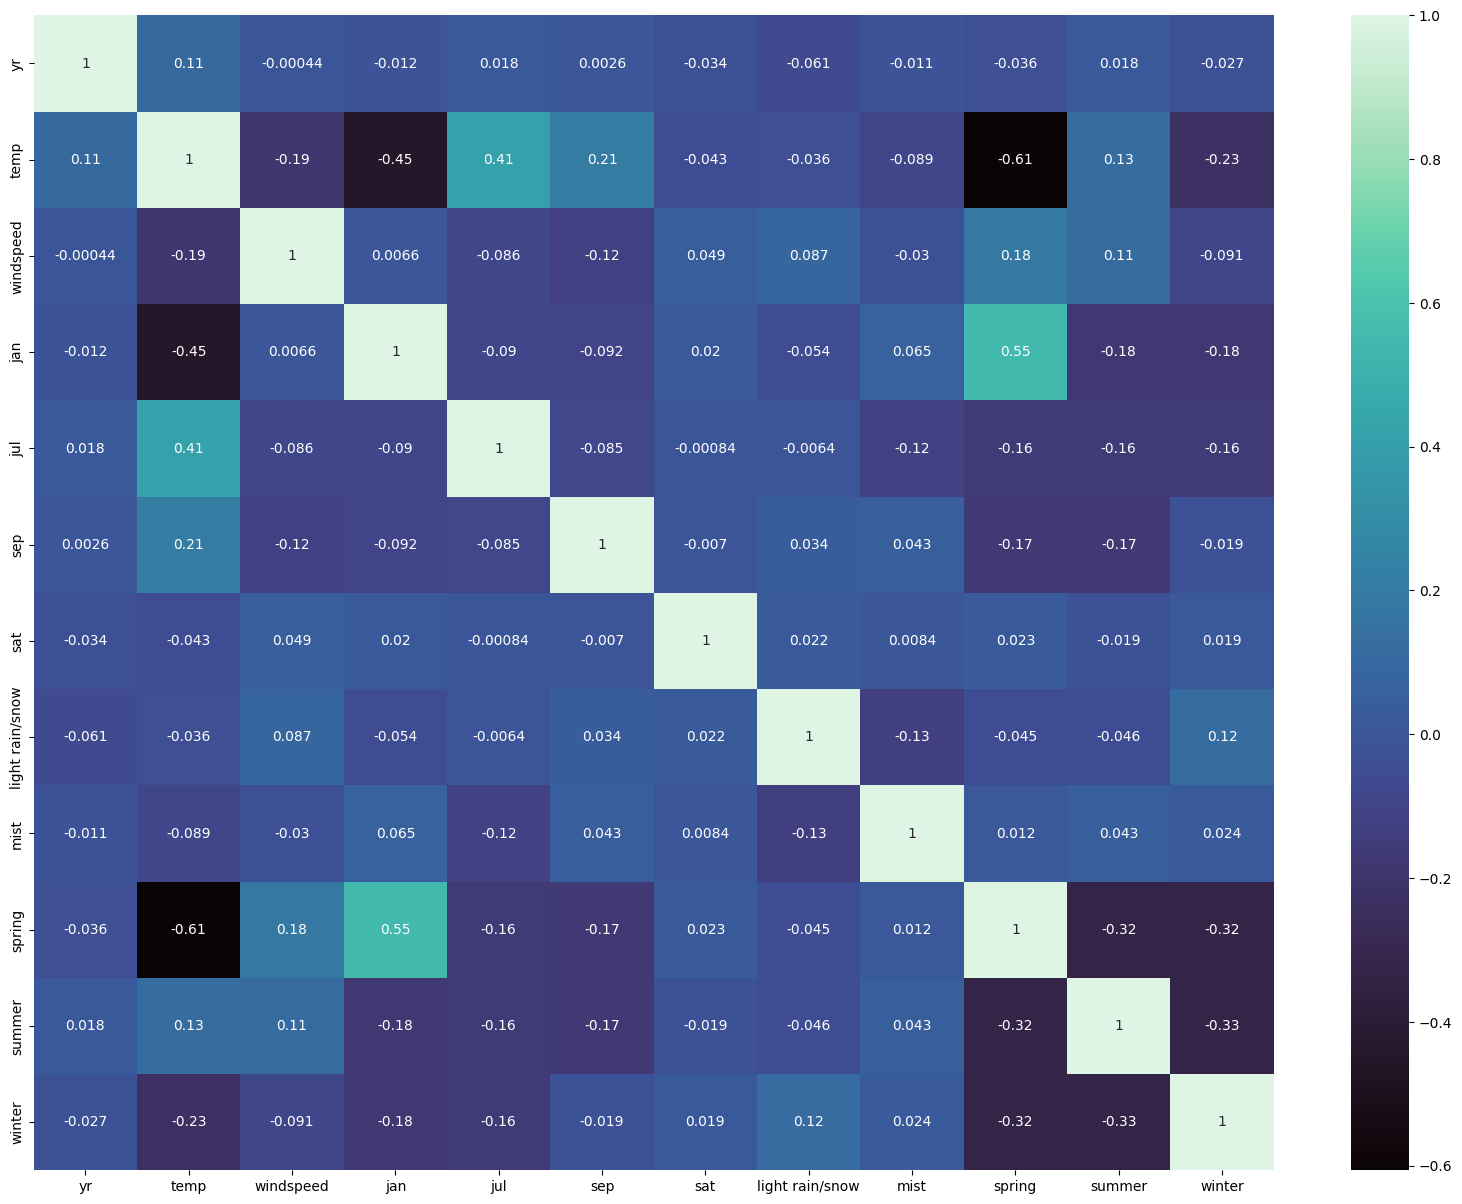

In [887]:
# heatmap for the final model dataframe.
plt.figure(figsize=(20,15))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap='mako')
plt.show()

# Residual Analysis


In [888]:
# adding constant to final model variables.
X_train_rfe = sm.add_constant(X_train_rfe)

In [889]:
# predicting the y train values with x train
y_train_pred = lr_4.predict(X_train_rfe)

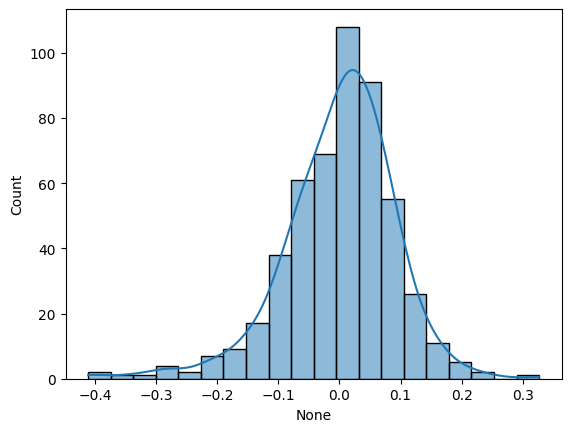

In [890]:
# checking normality of error terms
sns.histplot(x=(y_train - y_train_pred),bins=20,kde=True)
plt.show()

Error terms are normally distributed.


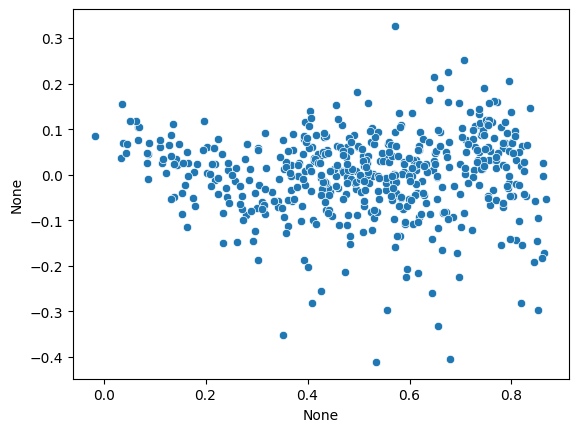

In [891]:
# Homoscedasticity check (There should be no visible pattern in residual values.)
sns.scatterplot(x=y_train_pred,y=(y_train - y_train_pred))
plt.show()

There is no visible pattern in residual values.


# Prediction on test data


In [892]:
# scaling the test data with train data scaler.

test_df[numerical_variables] = scaler.transform(test_df[numerical_variables])
test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light rain/snow,mist,spring,summer,winter
184,0,1,0,0.831783,33.27085,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,36.04875,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,22.85230,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,34.24915,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,32.19710,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [893]:
# checking the statistical data after scaling.
test_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light rain/snow,mist,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,24.250312,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,8.281075,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,4.941955,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,17.090025,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,24.700000,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,31.124313,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,41.318550,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [894]:
# dividing the data into dependent and independent features.
y_test = test_df.pop("cnt")
X_test = test_df

In [895]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,light rain/snow,mist,spring,summer,winter
184,0,1,0,0.831783,33.27085,0.657364,0.084219,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,36.04875,0.610133,0.153728,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,22.85230,0.837699,0.334206,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,34.24915,0.437098,0.339570,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,32.19710,0.314298,0.537414,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [896]:
# creating X_test_rfe with final model features and removing all the other features.
X_test_rfe = X_test[[ 'yr', 'temp', 'windspeed', 'jan', 'jul', 'oct', 'sep', 'sun', 'light rain/snow', 'spring']]
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.head()

,const,yr,temp,windspeed,jan,jul,oct,sep,sun,light rain/snow,spring
184,1.0,0,0.831783,0.084219,0,1,0,0,0,0,0
535,1.0,1,0.901354,0.153728,0,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1,0,0,0,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0,0,0


In [907]:
X_test_rfe = X_test[['yr', 'temp', 'windspeed', 'jan', 'jul', 'sep', 'sat', 'light rain/snow', 'mist', 'spring', 'summer', 'winter']]
X_test_rfe = sm.add_constant(X_test_rfe)

In [908]:
# predicting the y test values with x test
y_test_pred = lr_4.predict(X_test_rfe)

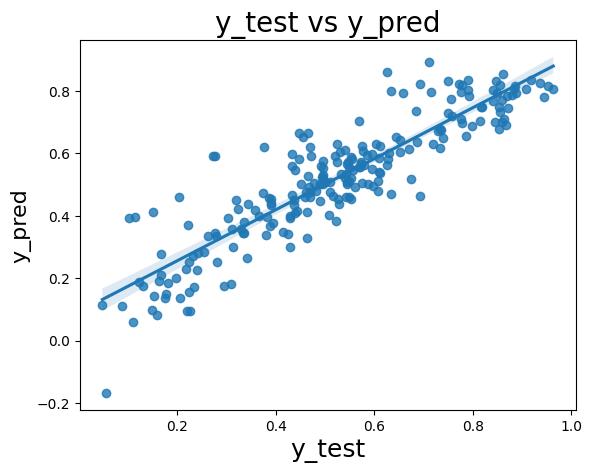

In [909]:
# Plotting the data

sns.regplot(x=(y_test),y=(y_test_pred),fit_reg=True)
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# R2 Score


In [910]:
# calculating the r2 score for both training dataset and testing dataset
print('Train r2: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('Test r2: ',r2_score(y_true=y_test,y_pred=y_test_pred))

Train r2:  0.8336144886385302
Test r2:  0.8012391024419653


In [911]:
# checking the mean squared error for both training and testing dataset.
print('Train mean squared error: ',mean_squared_error(y_true=y_train,y_pred=y_train_pred))
print('Test mean squared error: ',mean_squared_error(y_true=y_test,y_pred=y_test_pred))

Train mean squared error:  0.008363528473543916
Test mean squared error:  0.009503609110994413


In [912]:
# final model params
lr_4.params

,0
const,0.209904
yr,0.235150
temp,0.474100
windspeed,-0.159130
jan,-0.039412
jul,-0.049775
sep,0.072830
sat,0.023100
light rain/snow,-0.282019
mist,-0.077749


## Final Equation

cnt = yr*0.237132 + temp*0.388947 + windspeed*(-0.160217) + Jan*(-0.050699) + July*(-0.064112) + Oct*0.052266 + Sept*0.060748 + Sat*0.023058 + Cloudy*(-0.078506) + Light_snow_rain*(-0.290117) + spring*(-0.121727) + 0.297184